In [1]:
from DiffeoOT_S1 import *
from utils import *
import torch
import torch.nn.functional as tnn
import time 
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [2]:
m=36
x =2*np.pi*torch.arange(0,m)/m
print(x.shape)
grid = torch.stack([torch.cos(x),torch.sin(x)], dim=1).T
print(grid.shape)

torch.Size([36])
torch.Size([2, 36])


In [3]:
mu1= torch.ones(m)
mu1[0]=4
mu1[12]=4
mu1[24]=4
mu1/=mu1.sum()
mu2= torch.ones(m)
mu2[0]=4
mu2[9]=4
mu2[18]=4
mu2[27]=4
mu2/=mu2.sum()

In [4]:
params=[]
params+=[{'T':12, 'match_coeff':100000000000, 'path_coeff':1}]

In [5]:
def inner_prod(X,source,p,grid):
    pX= p*X
    return (((pX)**2).sum(dim=0)/p).sum()  

In [6]:
start =time.time()
vecs = DiffeoOT_multires(mu1,mu2,grid,params,inner_prod)
pl_pathlength = path_length(mu1,vecs,grid,inner_prod)
print(pl_pathlength)
N=vecs.shape[0]
print(pl_pathlength.sum()/pl_pathlength.shape[0])

[6.07514572 5.80447332 5.66731048 5.59315559 5.54156706 5.49695957
 5.46004561 5.44270569 5.46624456 5.55715968 5.73562665]
5.621853993119754


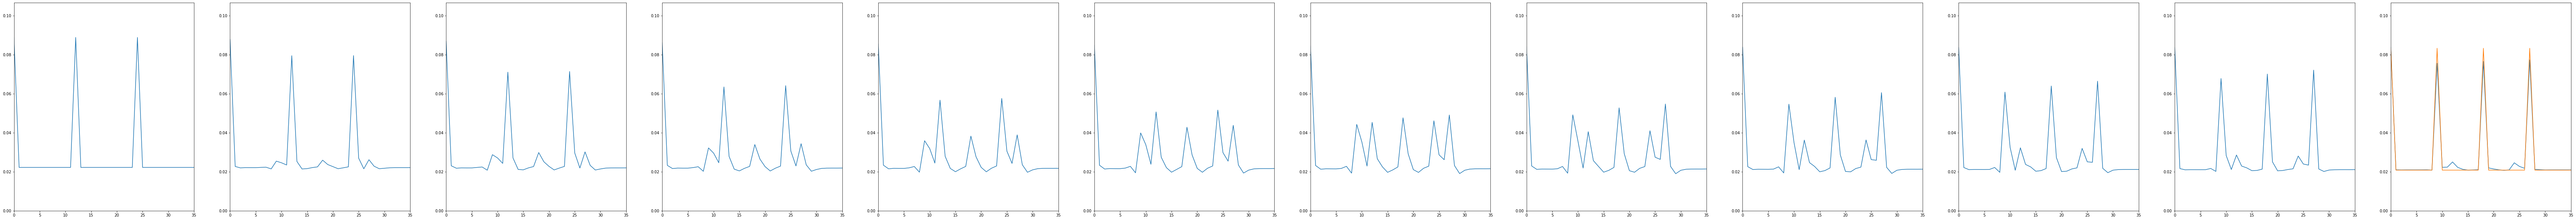

In [7]:
ls = make_and_plot_sequenceS1(mu1,mu2,vecs, grid)

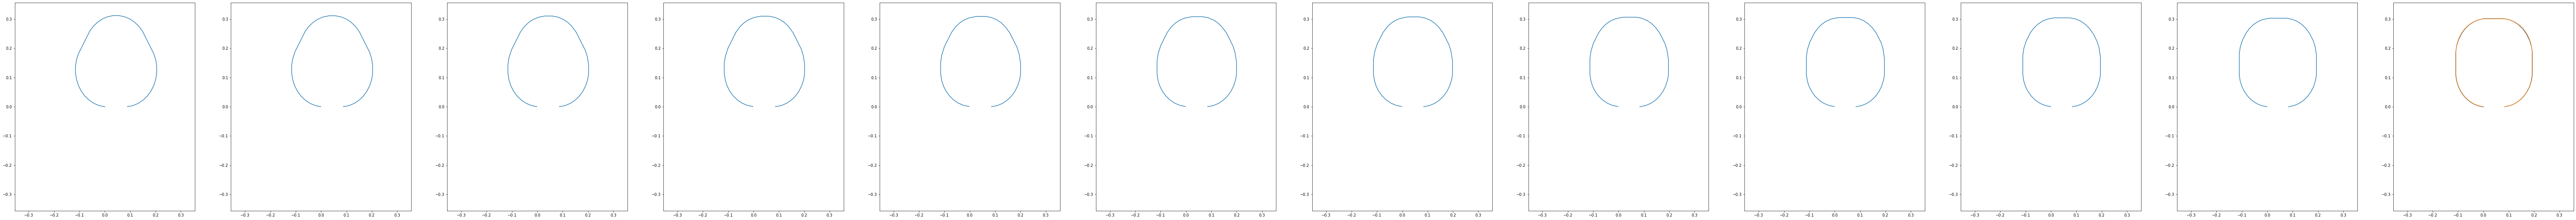

In [8]:
ls = make_and_plot_sequenceS1_c(mu1,mu2,vecs, grid)

In [9]:
p=mu1
T=vecs.shape[0]
wsupp= torch.stack([(p*grid[0]),(p*grid[1])],dim=1)
print((wsupp.sum(dim=0)**2).sum())
for i in range(1,T):    
    X=vecs[i]
    p=resample_densityS1(p,grid,X,T-1)
    wsupp= torch.stack([(p*grid[0]),(p*grid[1])],dim=1)
    print((wsupp.sum(dim=0)**2).sum())

tensor(3.2981e-16)
tensor(1.0557e-06, dtype=torch.float64)
tensor(3.3175e-06, dtype=torch.float64)
tensor(5.6025e-06, dtype=torch.float64)
tensor(7.1445e-06, dtype=torch.float64)
tensor(7.6153e-06, dtype=torch.float64)
tensor(7.0293e-06, dtype=torch.float64)
tensor(5.6337e-06, dtype=torch.float64)
tensor(3.8160e-06, dtype=torch.float64)
tensor(2.0337e-06, dtype=torch.float64)
tensor(7.7334e-07, dtype=torch.float64)
tensor(5.7090e-07, dtype=torch.float64)


In [10]:
import ot
supports = grid.reshape(m*m,1,2)
costmatrix = ((supports-supports.transpose(0,1))**2).sum(dim=2).cpu().numpy()
m1=mu_1[0,0].reshape(m*m).cpu().numpy()
m2=mu_2[0,0].reshape(m*m).cpu().numpy()

Wd =  ot.sinkhorn2(m1, m2, costmatrix, .00075)
print(np.sqrt(Wd))

RuntimeError: shape '[1296, 1, 2]' is invalid for input of size 72